# Spaceship Titanic

## Data Exploration

## Table of Contents
- [Spaceship Titanic](#spaceship-titanic)
- [Data Exploration](#data-exploration)
- [Table of Contents](#table-of-contents)
- [Config](#config)
- [Dependencies](#dependencies)
- [Data Extraction](#data-extraction)
- [Dataset Exploration](#dataset-exploration)
    - [Preliminary Look](#preliminary-look)
        - [Shape](#shape)
        - [General Information](#general-information)
        - [Description](#description)
        - [Missing Columns](#missing-columns)
    - [Visualization](#visualization)
        - [Correlation Heatmap](#correlation-heatmap)
        - [Histograms](#histograms)
            - [Numerical Data](#numerical-data)
            - [Catagorical Data](#catagorical-data)
        - [Standard Deviation Plots](#standard-deviation-plots)

### Config

Set up directory variables.

In [17]:
dataset = "spaceship-titanic"
dataset_directory = f"../../datasets/{dataset}"
training_dataset_directory = f"{dataset_directory}/train.csv"
test_dataset_directory = f"{dataset_directory}/test.csv"

spaceship_titanic_numeric_constants_file_path = "./constants/spaceship_titanic_numeric_constants.json"

### Dependencies

In [5]:
%conda install pandas numpy matplotlib seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../helpers')

from calculate_numeric_constants import calculate_numeric_constants

### Data Extraction

In [8]:
spaceship_titanic_train_dataframes = pd.read_csv(training_dataset_directory)
spaceship_titanic_train_dataframes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
spaceship_titanic_test_dataframes = pd.read_csv(test_dataset_directory)
spaceship_titanic_test_dataframes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Dataset Exploration
#### Preliminary Look
##### Shape

In [10]:
print(spaceship_titanic_train_dataframes.shape)
print(spaceship_titanic_test_dataframes.shape)

(8693, 14)
(4277, 13)


##### General Information

In [11]:
spaceship_titanic_train_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
spaceship_titanic_test_dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


##### Description

In [13]:
spaceship_titanic_train_dataframes.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [14]:
spaceship_titanic_test_dataframes.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [18]:
calculate_numeric_constants(dataframe = spaceship_titanic_train_dataframes, path_to_constants_file=spaceship_titanic_numeric_constants_file_path)

##### Missing Columns

In [19]:
spaceship_titanic_train_dataframes.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [20]:
spaceship_titanic_test_dataframes.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#### Visualization
##### Correlation Heatmap

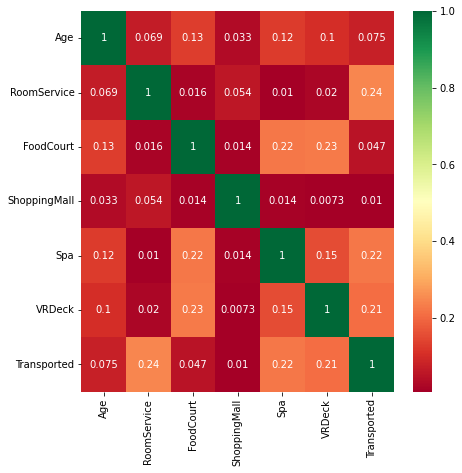

In [21]:

corr = spaceship_titanic_train_dataframes.corr()
corr = corr.apply(abs)
plt.figure(figsize=(7,7))
map = sns.heatmap(corr,annot=True,cmap="RdYlGn")


##### Histograms
##### Numerical Data

<AxesSubplot:xlabel='Age', ylabel='Count'>

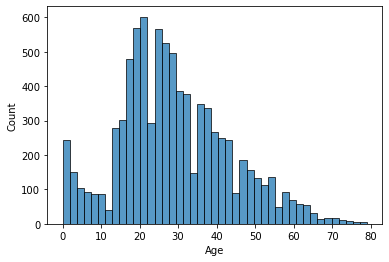

In [22]:
sns.histplot(spaceship_titanic_train_dataframes['Age'].dropna())

Age appears to be right-skewed.

Maximum value is: 22408.0 so number of buckets is 23


<AxesSubplot:xlabel='RoomService', ylabel='Count'>

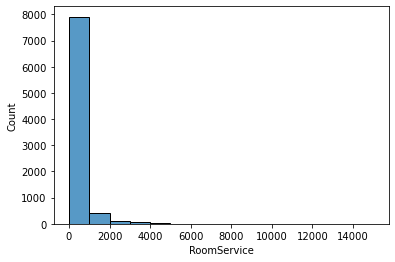

In [23]:
room_service_max = spaceship_titanic_train_dataframes['Spa'].max()
room_service_number_of_buckets = int(room_service_max // 1000 + 1)
print(f"Maximum value is: {room_service_max} so number of buckets is {room_service_number_of_buckets}")
sns.histplot(spaceship_titanic_train_dataframes['RoomService'].dropna(), bins=room_service_number_of_buckets, binwidth= 1000)

RoomService appears to be right-skewed.

Maximum value is: 22408.0 so number of buckets is 23


<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

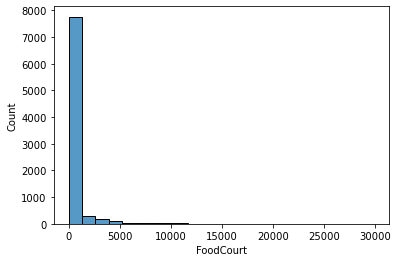

In [25]:
food_court_max = spaceship_titanic_train_dataframes['Spa'].max()
food_court_number_of_buckets = int(food_court_max // 1000 + 1)
print(f"Maximum value is: {food_court_max} so number of buckets is {food_court_number_of_buckets}")
sns.histplot(spaceship_titanic_train_dataframes['FoodCourt'].dropna(), bins=food_court_number_of_buckets)

FoodCourt appears to be right-skewed.

Maximum value is: 23492.0 so number of buckets is 24


<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

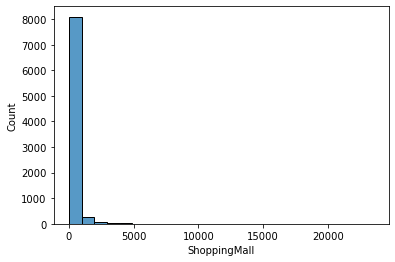

In [38]:
shopping_mall_max = spaceship_titanic_train_dataframes['ShoppingMall'].max()
shopping_mall_number_of_buckets = int(shopping_mall_max // 1000 + 1)
print(f"Maximum value is: {shopping_mall_max} so number of buckets is {shopping_mall_number_of_buckets}")
sns.histplot(spaceship_titanic_train_dataframes['ShoppingMall'].dropna(), bins=shopping_mall_number_of_buckets)

ShoppingMall appears to be right-skewed.

Maximum value is: 22408.0 so number of buckets is 23


<AxesSubplot:xlabel='Spa', ylabel='Count'>

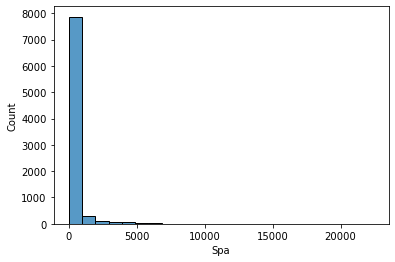

In [26]:
spa_max = spaceship_titanic_train_dataframes['Spa'].max()
spa_number_of_buckets = int(spa_max // 1000 + 1)
print(f"Maximum value is: {spa_max} so number of buckets is {spa_number_of_buckets}")
sns.histplot(spaceship_titanic_train_dataframes['Spa'].dropna(), bins=spa_number_of_buckets)

Spa appears to be right-skewed.

Maximum value is: 24133.0 so number of buckets is 25


<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

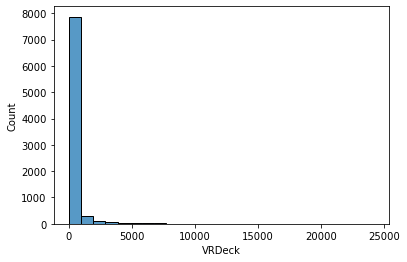

In [27]:
vr_deck_max = spaceship_titanic_train_dataframes['VRDeck'].max()
vr_deck_number_of_buckets = int(vr_deck_max // 1000 + 1)
print(f"Maximum value is: {vr_deck_max} so number of buckets is {vr_deck_number_of_buckets}")
sns.histplot(spaceship_titanic_train_dataframes['VRDeck'].dropna(), bins=vr_deck_number_of_buckets)

VRDeck appears to be right-skewed.

##### Catagorical Data

<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

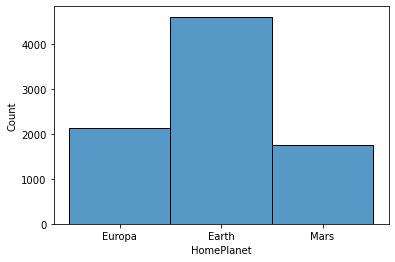

In [29]:
sns.histplot(spaceship_titanic_train_dataframes['HomePlanet'].dropna())

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

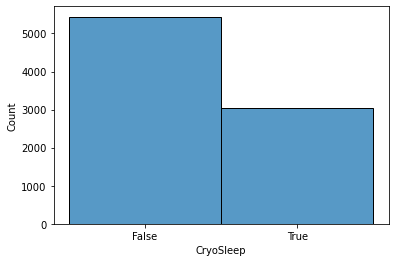

In [30]:
sns.histplot(spaceship_titanic_train_dataframes['CryoSleep'].dropna().astype('str'))

<AxesSubplot:xlabel='Destination', ylabel='Count'>

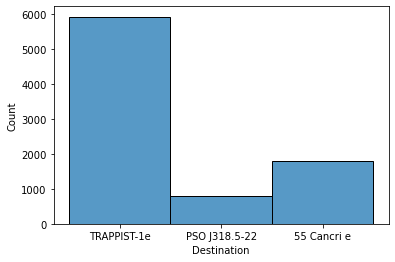

In [31]:
sns.histplot(spaceship_titanic_train_dataframes['Destination'].dropna())

<AxesSubplot:xlabel='VIP', ylabel='Count'>

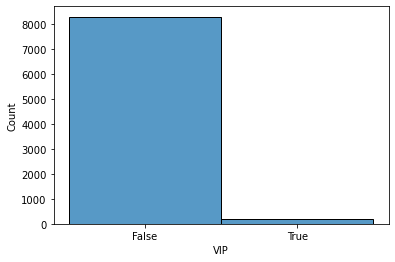

In [32]:
sns.histplot(spaceship_titanic_train_dataframes['VIP'].dropna().astype('str'))

#### Standard Deviation Plots

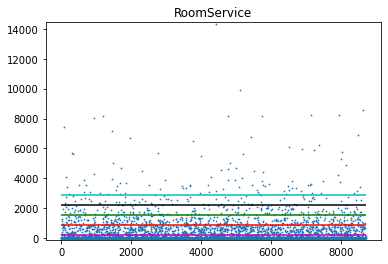

In [35]:
data = spaceship_titanic_train_dataframes['RoomService']
mean = spaceship_titanic_train_dataframes['RoomService'].mean()
std = spaceship_titanic_train_dataframes['RoomService'].std()
min_value = min(data)
max_value = max(data)

plt.title("RoomService")
plt.ylim(min_value - 100, max_value + 100)
plt.scatter(x=spaceship_titanic_train_dataframes.index, y=spaceship_titanic_train_dataframes['RoomService'], s=1/2)
plt.hlines(y=mean, xmin=0, xmax=len(data), color='k')

plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

plt.hlines(y=mean - 3*std, xmin=0, xmax=len(data), colors='m')
plt.hlines(y=mean + 3*std, xmin=0, xmax=len(data), colors='m')

plt.show()


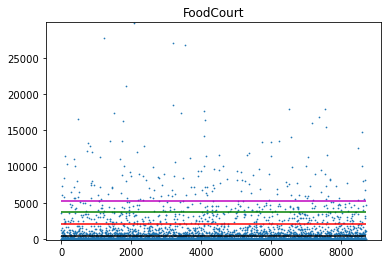

In [36]:
data = spaceship_titanic_train_dataframes['FoodCourt']
mean = spaceship_titanic_train_dataframes['FoodCourt'].mean()
std = spaceship_titanic_train_dataframes['FoodCourt'].std()
min_value = min(data)
max_value = max(data)

plt.title("FoodCourt")
plt.ylim(min_value - 100, max_value + 100)
plt.scatter(x=spaceship_titanic_train_dataframes.index, y=spaceship_titanic_train_dataframes['FoodCourt'], s=1/2)
plt.hlines(y=mean, xmin=0, xmax=len(data), color='k')

plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

plt.hlines(y=mean - 3*std, xmin=0, xmax=len(data), colors='m')
plt.hlines(y=mean + 3*std, xmin=0, xmax=len(data), colors='m')

plt.show()

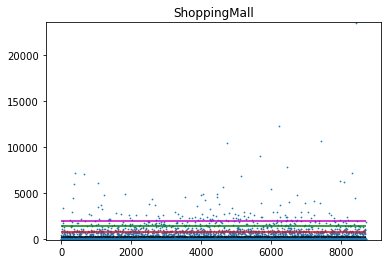

In [39]:
data = spaceship_titanic_train_dataframes['ShoppingMall']
mean = spaceship_titanic_train_dataframes['ShoppingMall'].mean()
std = spaceship_titanic_train_dataframes['ShoppingMall'].std()
min_value = min(data)
max_value = max(data)

plt.title("ShoppingMall")
plt.ylim(min_value - 100, max_value + 100)
plt.scatter(x=spaceship_titanic_train_dataframes.index, y=spaceship_titanic_train_dataframes['ShoppingMall'], s=1/2)
plt.hlines(y=mean, xmin=0, xmax=len(data), color='k')

plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

plt.hlines(y=mean - 3*std, xmin=0, xmax=len(data), colors='m')
plt.hlines(y=mean + 3*std, xmin=0, xmax=len(data), colors='m')

plt.show()

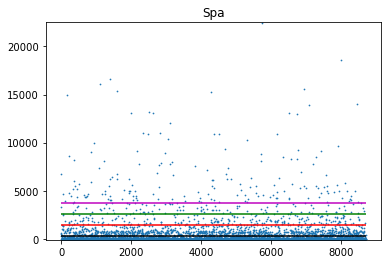

In [40]:
data = spaceship_titanic_train_dataframes['Spa']
mean = spaceship_titanic_train_dataframes['Spa'].mean()
std = spaceship_titanic_train_dataframes['Spa'].std()
min_value = min(data)
max_value = max(data)

plt.title("Spa")
plt.ylim(min_value - 100, max_value + 100)
plt.scatter(x=spaceship_titanic_train_dataframes.index, y=spaceship_titanic_train_dataframes['Spa'], s=1/2)
plt.hlines(y=mean, xmin=0, xmax=len(data), color='k')

plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

plt.hlines(y=mean - 3*std, xmin=0, xmax=len(data), colors='m')
plt.hlines(y=mean + 3*std, xmin=0, xmax=len(data), colors='m')

plt.show()

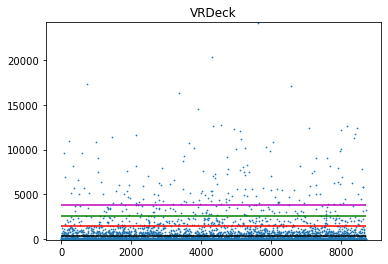

In [41]:
data = spaceship_titanic_train_dataframes['VRDeck']
mean = spaceship_titanic_train_dataframes['VRDeck'].mean()
std = spaceship_titanic_train_dataframes['VRDeck'].std()
min_value = min(data)
max_value = max(data)

plt.title("VRDeck")
plt.ylim(min_value - 100, max_value + 100)
plt.scatter(x=spaceship_titanic_train_dataframes.index, y=spaceship_titanic_train_dataframes['VRDeck'], s=1/2)
plt.hlines(y=mean, xmin=0, xmax=len(data), color='k')

plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')

plt.hlines(y=mean - 3*std, xmin=0, xmax=len(data), colors='m')
plt.hlines(y=mean + 3*std, xmin=0, xmax=len(data), colors='m')

plt.show()